# WeatherPy
----
**Latitude Information**
1. Negative Values: Southern Hemisphere
2. 0 Value: Equator
3. Positive Values: Northern Hemisphere

### Analysis
**Latitude vs Maximum Temperature**
* Cities near the equator experience the highest maximum temperature.  As the latitude increases , the temperature drops significantly.  In general, the Southern Hemisphere have higher temperature than the Northern Hemisphere.

**Latitude vs Humidity and Latitude vs Cloudiness**
* The correlation between these 2 analysis have close to a zero correlation but the following trends are found:  
    * Almost 80% of the cities have humidity of 60% or more.
    * Majority of the cities have 0% or 80-100% clouiness.

**Latitude vs Wind Speed**
* There is no strong relationship between latitude and wind speed as the correlation is only 0.15. However, in the Northern Hemisphere, the cities that experience lower temperature have higher windspeeds of 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

624


In [16]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.

#Perform a quick test by coming up with a list of cities with successive API calls.  
#Also, I included a list of towns and random names to test if the try & except test works before running API calls of a  list of 500+ cites. 
city_test = ['Toronto', 'Paris', 'Zagreb', 'Hoian', 'Windsor', 'Unionville', 'Mississauga', 'Hanoi', 'San Francisco', 
             'Pickering','Raptors','Mississauga', 'Darth Vader', 'Chewy']

#Find url to extract api from owm website
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Create Empty List and set value at city count
city_test_list = []
city_number=1

#Include a print log of each city as it'sbeing processed (with the city number and city name).
for i in city_test:
    city_url = base_url + i
    response_test= requests.get(city_url).json()

    try:
        city_test_list.append(response_test['name'])
        print(f"Processing record {city_number} of|{i}")
        city_number +=1
        
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass

    

Processing record 1 of|Toronto
Processing record 2 of|Paris
Processing record 3 of|Zagreb
City not found.  Skipping..
Processing record 4 of|Windsor
Processing record 5 of|Unionville
Processing record 6 of|Mississauga
Processing record 7 of|Hanoi
Processing record 8 of|San Francisco
Processing record 9 of|Pickering
City not found.  Skipping..
Processing record 10 of|Mississauga
City not found.  Skipping..
City not found.  Skipping..


In [4]:
# Create empty lists for dataframe to plot data
cityname = []
temperature_max = []
cloudiness =[]
humidity=[]
windspeed=[]
latitude=[]
longitude=[]
date=[]
country = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Set value for record and set count
record = 1
set_number = 1

# Loop through the cities in the full cities list to get all the required weather information through API calls.
# Also, to get a print log of all the cities found from calling the API.


for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=imperial").json()

    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_max.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing record {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass
print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found.  Skipping..
City not found.  Skipping..
Processing record 1 of set 1|cape town
City not found.  Skipping..
Processing record 2 of set 1|saint-philippe
City not found.  Skipping..
Processing record 3 of set 1|havoysund
Processing record 4 of set 1|benavente
City not found.  Skipping..
Processing record 5 of set 1|port blair
Processing record 6 of set 1|lebu
Processing record 7 of set 1|albany
Processing record 8 of set 1|busselton
Processing record 9 of set 1|ituango
City not found.  Skipping..
Processing record 10 of set 1|sao joao da barra
Processing record 11 of set 1|ahipara
Processing record 12 of set 1|broome
City not found.  Skipping..
Processing record 13 of set 1|arraial do cabo
Processing record 14 of set 1|atuona
Processing record 15 of set 1|hermanus
Processing record 16 of set 1|klaksvik
City not found.  Skipping..
Processing record 17 of set 1|norman wells
Processing record 18 of set 1|sibolga
Processin

Processing record 41 of set 4|vestmannaeyjar
Processing record 42 of set 4|fortuna
Processing record 43 of set 4|cianorte
Processing record 44 of set 4|uige
Processing record 45 of set 4|bengkulu
Processing record 46 of set 4|east london
Processing record 47 of set 4|olavarria
Processing record 48 of set 4|taoudenni
Processing record 49 of set 4|oranjemund
Processing record 50 of set 4|jackson
Processing record 1 of set 5|mega
City not found.  Skipping..
Processing record 2 of set 5|krk
Processing record 3 of set 5|charyshskoye
Processing record 4 of set 5|kavaratti
Processing record 5 of set 5|betanzos
Processing record 6 of set 5|pierre
Processing record 7 of set 5|brusque
Processing record 8 of set 5|cidreira
Processing record 9 of set 5|nemuro
Processing record 10 of set 5|fairbanks
Processing record 11 of set 5|lazaro cardenas
Processing record 12 of set 5|mayumba
Processing record 13 of set 5|knokke-heist
Processing record 14 of set 5|japura
Processing record 15 of set 5|port kea

Processing record 39 of set 8|coos bay
Processing record 40 of set 8|tasiilaq
Processing record 41 of set 8|gazanjyk
Processing record 42 of set 8|dehui
Processing record 43 of set 8|puerto madero
Processing record 44 of set 8|ancud
Processing record 45 of set 8|aktas
Processing record 46 of set 8|roald
City not found.  Skipping..
Processing record 47 of set 8|boende
Processing record 48 of set 8|lima
Processing record 49 of set 8|bathsheba
Processing record 50 of set 8|taua
Processing record 1 of set 9|angoche
Processing record 2 of set 9|caravelas
Processing record 3 of set 9|lohardaga
City not found.  Skipping..
Processing record 4 of set 9|quelimane
Processing record 5 of set 9|pasni
Processing record 6 of set 9|chippewa falls
Processing record 7 of set 9|mayo
Processing record 8 of set 9|baykit
Processing record 9 of set 9|nara
Processing record 10 of set 9|kita
Processing record 11 of set 9|turayf
Processing record 12 of set 9|tinskoy
Processing record 13 of set 9|neftegorsk
Proc

In [5]:
### Convert Raw Data to DataFrame
# Display the DataFrame
weather_data = pd.DataFrame({
    'City': cityname,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature': temperature_max,
    'Windspeed': windspeed
    
})
weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,cape town,0,ZA,1604285629,72,-33.93,18.42,62.60,10.29
1,saint-philippe,90,RE,1604285662,64,-21.36,55.77,69.80,4.70
2,havoysund,100,NO,1604285711,81,71.00,24.66,42.80,42.50
3,benavente,90,ES,1604285825,100,42.00,-5.68,53.60,3.36
4,port blair,56,IN,1604285825,72,11.67,92.75,83.53,5.79
...,...,...,...,...,...,...,...,...,...
562,daru,83,PG,1604285900,73,-9.08,143.21,85.01,11.88
563,general pico,79,AR,1604285900,63,-35.66,-63.76,58.78,10.18
564,belaya gora,100,RU,1604285900,88,68.53,146.42,-3.37,8.66
565,cap malheureux,84,MU,1604285900,63,-19.98,57.61,71.01,3.00


In [6]:
#count the number of records by columns
weather_data.count()

City               567
Cloudiness         567
Country            567
Date               567
Humidity           567
Latitude           567
Longitude          567
Max Temperature    567
Windspeed          567
dtype: int64

In [7]:
# Export the city data into a .csv.
weather_data.to_csv("Output Files/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

-0.6619193494582664

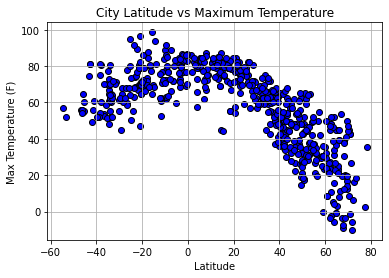

In [9]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,7], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_MaxTemp")

#Calculate r-value
slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,7])  
rvalue

#### Latitude vs. Humidity Plot

0.15655320965485814

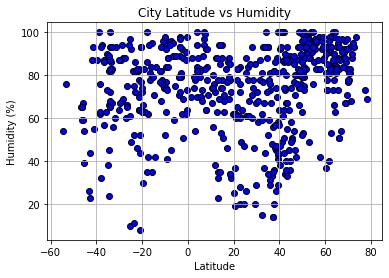

In [10]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,4], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Humidity")

# Save scatter plot as PNG in Output files directory


slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,4])  
rvalue

#### Latitude vs. Cloudiness Plot

0.06327052120531608

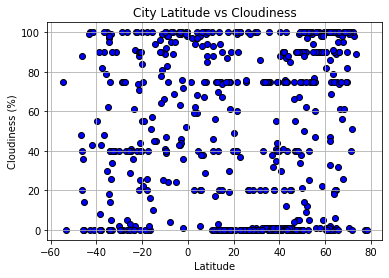

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,1], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Cloudiness")

slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,1])  
rvalue

#### Latitude vs. Wind Speed Plot

0.15048260519617082

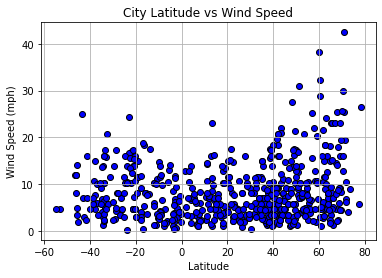

In [13]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,8], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# # Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_WindSpeed")

slope, intercept, rvalue, pvalue, stderr = linregress(weather_data.iloc[:,5], weather_data.iloc[:,8])  
rvalue